# jjun879 - ENGSCI 205 DS Lab 2 Ames Housing

#### Import Statements

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from dslab import distribution

%matplotlib inline
%load_ext autoreload
%autoreload 2

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

#### Read file and plot

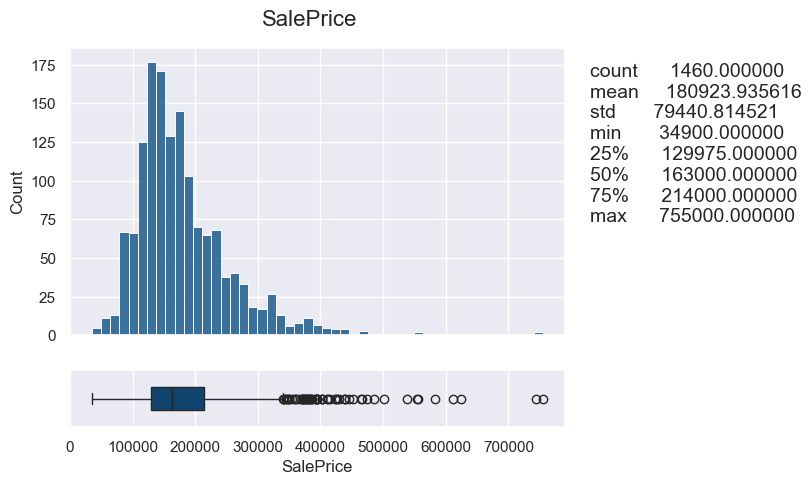

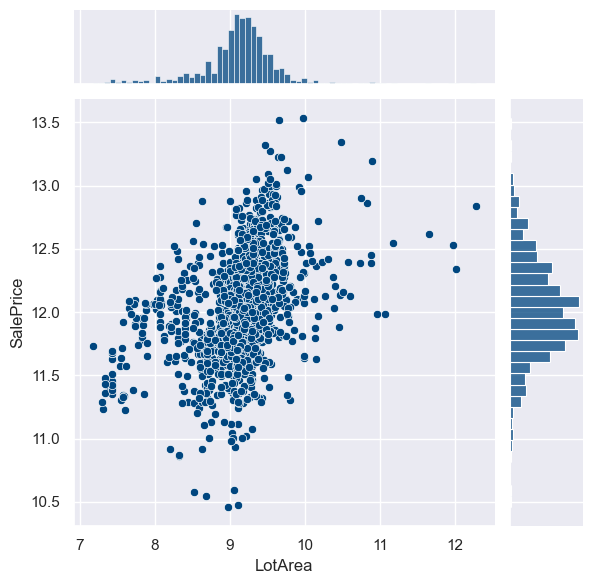

In [2]:
df = pd.read_csv('train.csv', index_col=0, na_values='NaN', keep_default_na=False)
test = pd.read_csv('test.csv', index_col=0, na_values='NaN', keep_default_na=False)

distribution(df['SalePrice'])
sns.jointplot(x = np.log(df['LotArea']), y = np.log(df['SalePrice']))

<Axes: xlabel='SalePrice', ylabel='Count'>

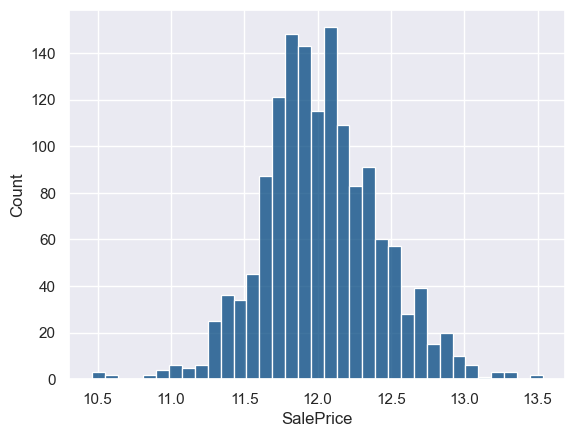

In [3]:
# Log the data to form a normal distribution
sns.histplot(np.log(df['SalePrice']))

Log-transforming the sale price values shows a more normally distributed values and would reduce the impact of outliers.

In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1474 to 1489
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null  

In [5]:
df.shape , df.describe().shape

((1460, 80), (8, 34))

In [6]:
# count the numerical and categorical values define them as 0's and 1 's
col = df.applymap(np.isreal).all()
print((col).value_counts())
# index coloumn is a numerical value hence subtract 34 - 1 = actual features that are numerical == 33

False    46
True     34
Name: count, dtype: int64


In [7]:
numerical_features = df.select_dtypes(include=['number'])
print('Number of numerical features: ', end='')
print(len(numerical_features.columns.values))
df.describe(exclude=['O'])

Number of numerical features: 34


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180923.935616
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79440.814521
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
categorical_features = df.select_dtypes(include=['object'])
print('Number of categotical features: ', end='')
print(len(categorical_features.columns.values))
df.describe(include=['object'])

Number of categotical features: 46


,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,111,2,3,4,4,2,5,3,25,...,98,4,6,6,3,4,5,5,9,6
top,RL,NA,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,NA,Unf,TA,TA,Y,NA,NA,NA,WD,Normal
freq,1151,259,1454,1369,925,1311,1459,1052,1382,225,...,81,605,1311,1326,1340,1453,1179,1406,1267,1198


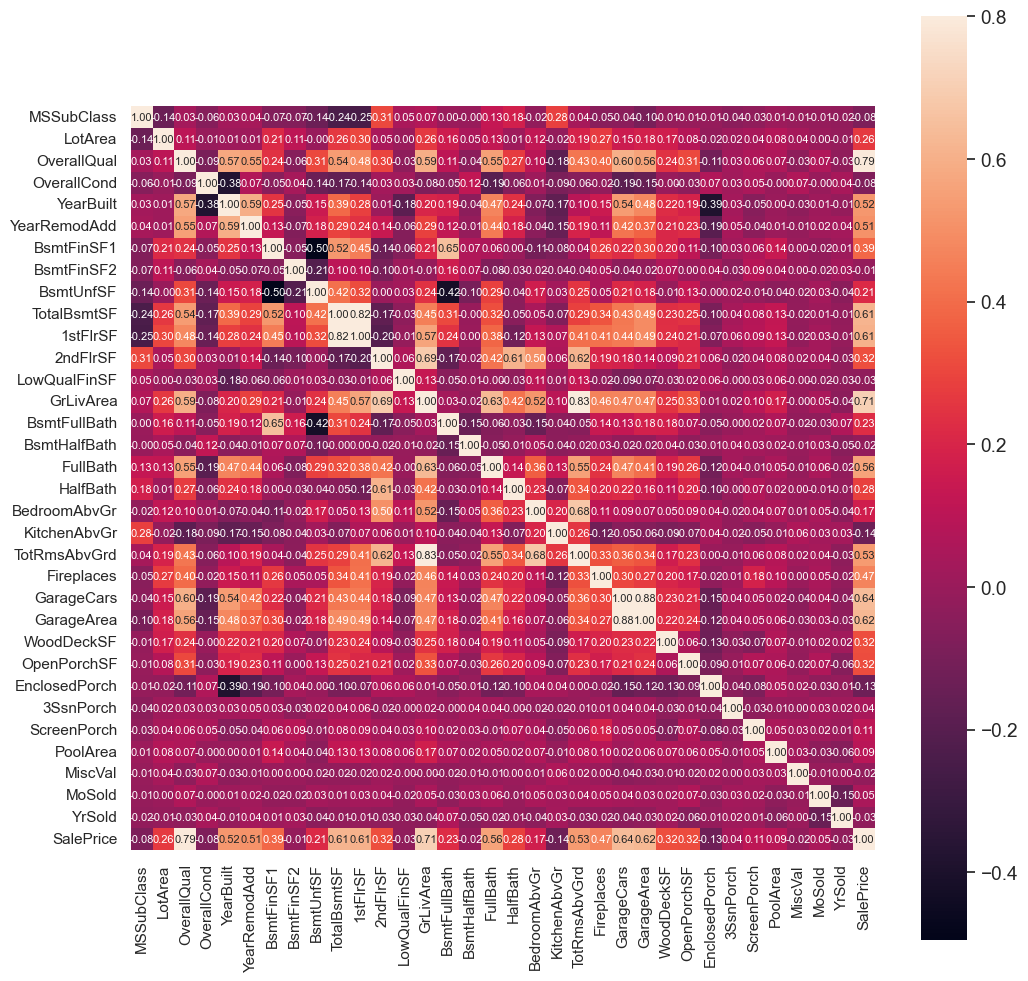

In [9]:
# Heatmap to visualise the correlation between the numerical features and the sale price
nu_corrmat = numerical_features.corr()
figure, axis = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.25)
sns.heatmap(nu_corrmat, vmax=.8, annot=True, square=True, annot_kws={'size':8}, fmt='.2f')
plt.show()

['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF']


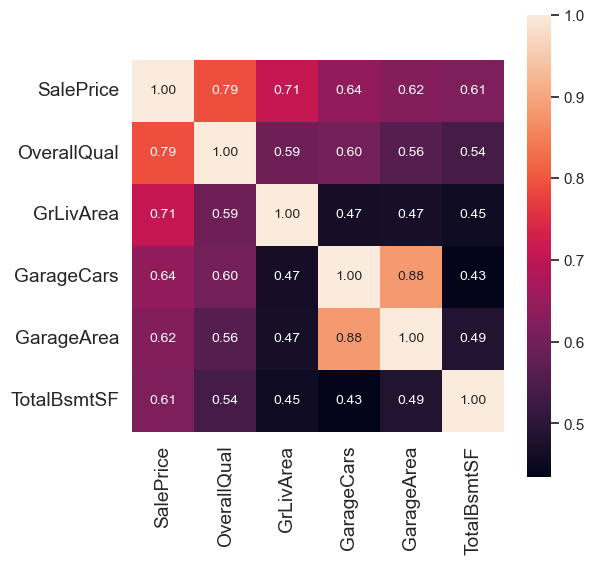

In [10]:
# Draw another Heatmap to visualise the correlation between the highest 5 numerical features and the sale price
n = 6
most_largest_features = nu_corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
important_feautures_corrmat = np.corrcoef(numerical_features[most_largest_features].values.T)
figure, axis = plt.subplots(figsize=(6,6))
sns.set()
sns.heatmap(important_feautures_corrmat, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=most_largest_features.values, xticklabels=most_largest_features.values)
print(most_largest_features.values)

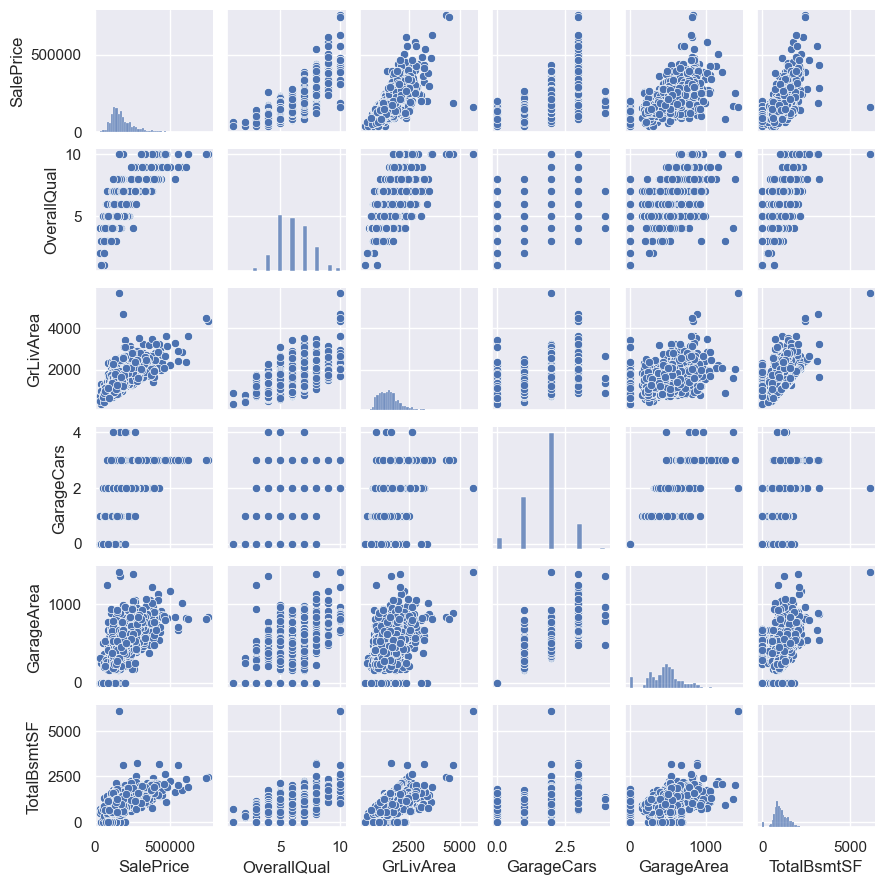

In [11]:
# Function that creates a scatter plot of the features with the highest correlation to the sale price
def most_related_features(df):
    sns.set()
    most_largest_features = nu_corrmat.nlargest(6, 'SalePrice')['SalePrice'].index
    sns.pairplot(numerical_features[most_largest_features.values],height=1.5)
    plt.show()

most_related_features(df)

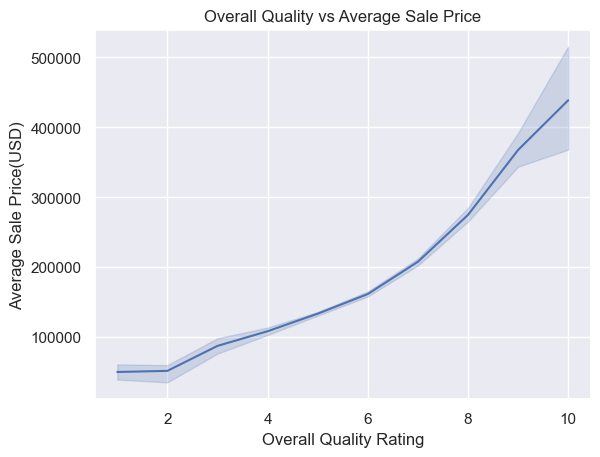

In [12]:
# Plot 1: Line Plot
# Function for the line plot of Overall quality of the house VS Sale price

def overallqual_vs_price(df):
    sns.lineplot(x='OverallQual', y='SalePrice', data=df)
    plt.title('Overall Quality vs Average Sale Price')
    plt.xlabel('Overall Quality Rating')
    plt.ylabel('Average Sale Price(USD)')
    plt.show()
    
overallqual_vs_price(df)

##### Explanatory analysis of the Line plot of 'Overall Quality vs Average Sale Price'

There appeared to be a significantly positive relationship between the overall quality of the house and the average sale price. 
The steep slope of the plot reveals that the impact of overall quality is significant on sale prices.
Therefore, as the overall quality of the house increases, we can expect the average sale price to also increases.


<Axes: xlabel='GrLivArea', ylabel='Count'>

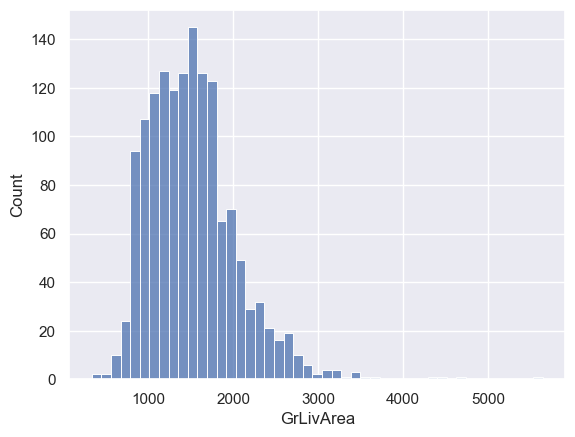

In [13]:
# Check the distribution of the living area above ground
sns.histplot(df['GrLivArea'])

Since the data for GrLivArea show a slight right-skew, it will be helpful to log-transform the data

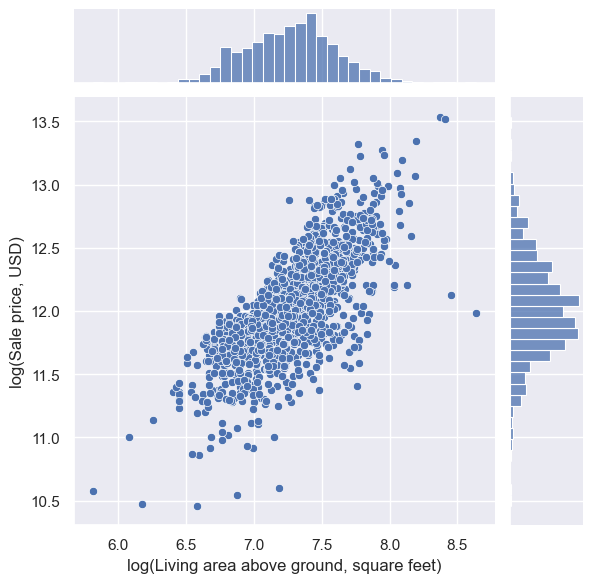

                                            log(Living area above ground, square feet)  \
log(Living area above ground, square feet)                                    1.000000   
log(Sale price, USD)                                                          0.730304   

                                            log(Sale price, USD)  
log(Living area above ground, square feet)              0.730304  
log(Sale price, USD)                                    1.000000  


In [14]:
# Plot 2: Joint plot
# Function for the joint plot of Total square feet of living area above ground VS Sale price
def livarea_vs_price(df):
    # Create a DataFrame for log-transformed living area and sale price
    livingareaVSprice = pd.DataFrame({'log(Living area above ground, square feet)': np.log(df['GrLivArea']), 'log(Sale price, USD)': np.log(df['SalePrice'])})
    # Plot the jointplot
    sns.jointplot(x='log(Living area above ground, square feet)', y='log(Sale price, USD)', data=livingareaVSprice)
    plt.show()
    # Print the correlation matrix
    print(livingareaVSprice.corr())
livarea_vs_price(df)

##### Explanatory analysis of the joint plot of 'Total living area above ground vs Sale Price'

There appears to be a strong, positive relationship between the log transformed living area above ground and sale price. 
The correlation value between the log-transformed living area and sale price is 0.730304, which indicates a strong positive correlation. 
Hence, we can expect that, as the living area increases, the sale price will also tend to increase. 
The histograms along each axis show the distribution of each variable. The data is log-transformed to allow a desirable visualisation, thus, the original values were spread over a wide range.

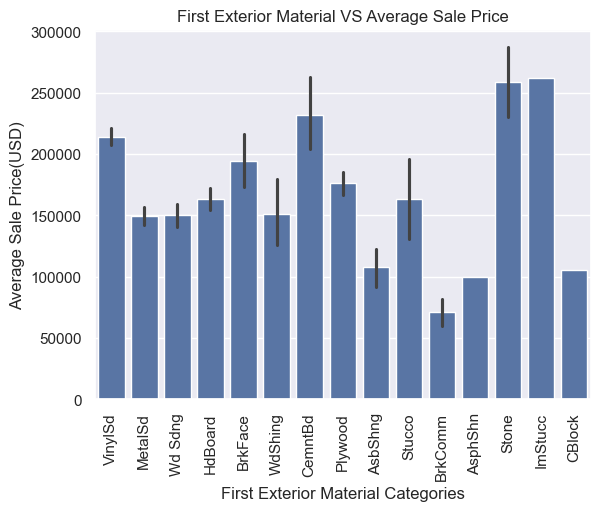

In [15]:
# Plot 3: Bar Plot
# Function for the bar plot of Exterior material VS Sale Price
def extmat_vs_price(df):
    # Plot the bar plot
    sns.barplot(x = 'Exterior1st', y = 'SalePrice', data = df)
    # Plot labels
    plt.title('First Exterior Material VS Average Sale Price')
    plt.xlabel('First Exterior Material Categories')
    plt.ylabel('Average Sale Price(USD)')
    plt.xticks(rotation=90)
extmat_vs_price(df)

##### Explanatory analysis of the Bar plot of 'First Exterior Material VS Average Sale Price'

As it can be observed by the plot, the average price of houses sold with each exterior material varies significantly for some material categories. 
We can observe that some materials such as Cement Board, Stone and Imitation Stucco have a higher average sale price compared to other materials. 
Additionally, Brick Common have a relatively low average sale price than others. 

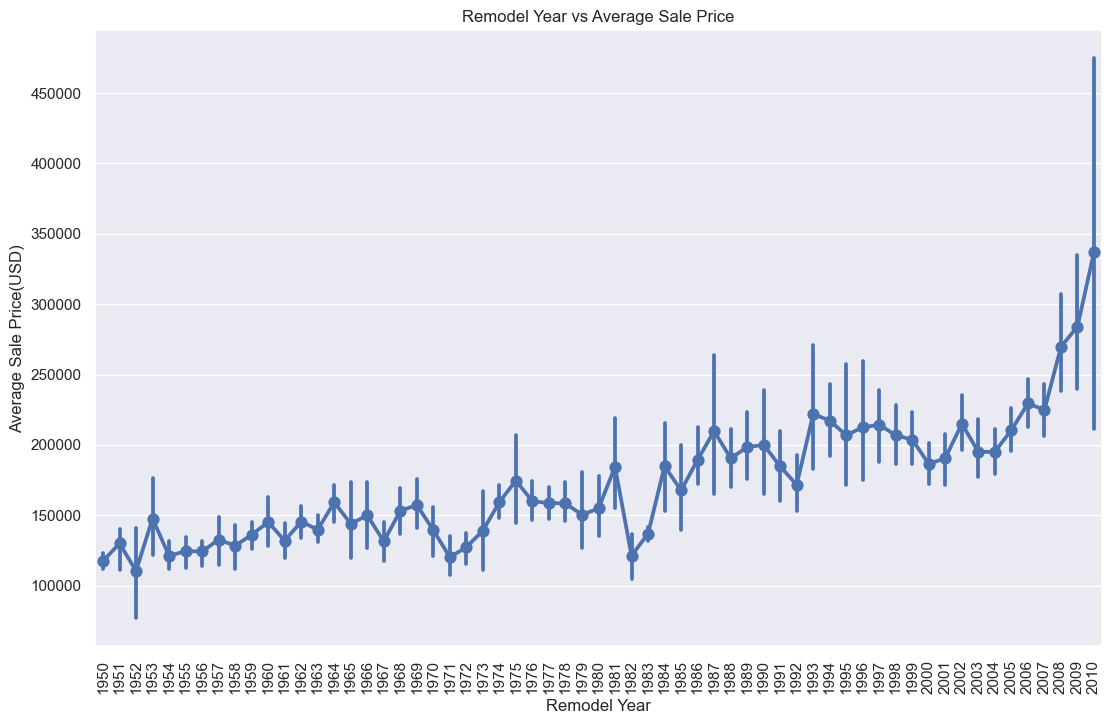

In [16]:
# Plot 4: Point Plot
# Function for the point plot of Remodel Year VS Sale Price (USD)
def remodelyr_vs_price(df):
    # Plot the point plot
    plt.figure(figsize = (13,8))
    sns.pointplot(x = 'YearRemodAdd', y = 'SalePrice', data = df)
    # Plot labels
    plt.title('Remodel Year vs Average Sale Price')
    plt.xlabel('Remodel Year')
    plt.ylabel('Average Sale Price(USD)')
    plt.xticks(rotation=90)
remodelyr_vs_price(df)

##### Explanatory analysis of the Point plot of 'Remodel Year vs Average Sale Price'

The plot shows a positive relationship/trend between the average sale price and the remodel year. 
This concludes that, if the house has been remodelled more recently, the sale price of the house is high compared to that of the houses that have been remodelled earlier.
The plot also includes error bars to indicate the variability or standard error around the mean sale price for each year.

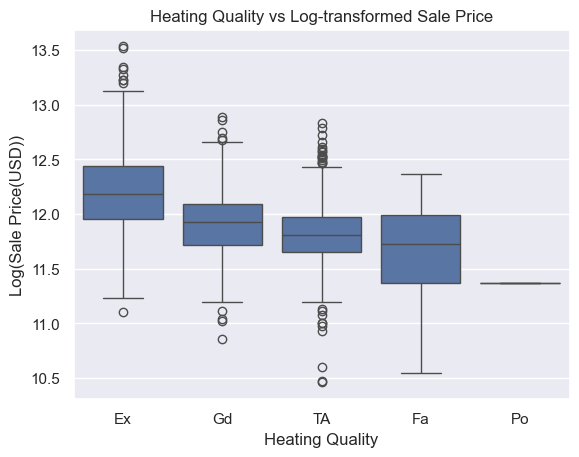

In [17]:
# Plot 5: Box Plot
# Function for the box plot of Heating quality VS Sale Price
def heatingqc_vs_price(df):
    heatingVSprice = pd.DataFrame({'HeatingQC': df['HeatingQC'], 'log(Sale price, USD)': np.log(df['SalePrice'])})
    # Plot the boxplot
    sns.boxplot(x = 'HeatingQC', y = 'log(Sale price, USD)', data = heatingVSprice)
    # Plot labels
    plt.title('Heating Quality vs Log-transformed Sale Price')
    plt.xlabel('Heating Quality')
    plt.ylabel('Log(Sale Price(USD))')
heatingqc_vs_price(df)

##### Explanatory analysis of the Box plot of 'Heating Quality vs Log-transformed Sale Price'

Through the box plot, it appears that the houses with excellent heating qualities tend to have a higher sale price.
With the log-transformed sale price, all five boxes of the heating quality seem to have a similar spread and roughly symmetrically distributed, except for the box of 'Po'(Poor) heating quality.
The centre of the boxplot for each quality rating tends to appear lower down the y-axis (sale price) as the heating quality changes from excellent to poor.

# Data Story

To initialise the analysis of the Ames Housing data set, I created a heatmap to visualise the correlation between each of the numerical features and the target variable, sale price. Out of the numerical features, I decided to analyse the features that show highest correlation with the sale price. I began with plotting the scatter plots of the top 5 (except for the target;Sale Price) correlation features.


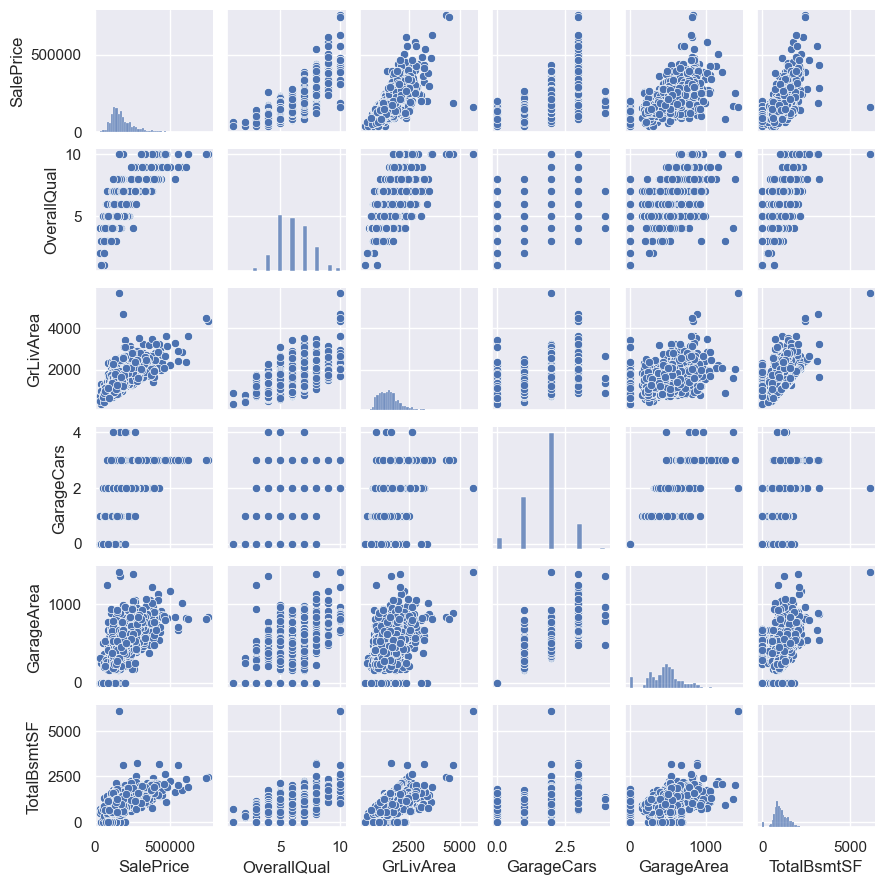

In [18]:
most_related_features(df)

The scatter plots generally show a strong, positive relationship between each numerical feature selected as having a high correlation and the sale price. However, features other than Overall quality and Above ground living area(square feet) do not apply to all samples(houses). Hence, the overall quality and the living area above ground were chosen to be further analysed.

#### Overall Quality VS Sale Price

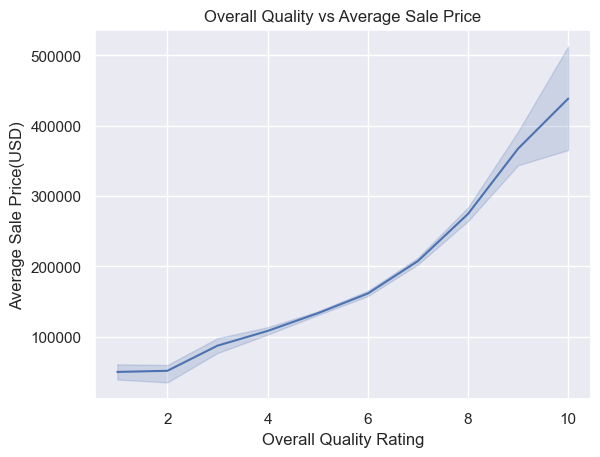

In [19]:
overallqual_vs_price(df)

In the line plot of 'Overall Quality VS Average Sale Price', there appeared to be a significantly positive relationship between the overall quality of the house and the average sale price. The steep slope of the plot reveals that the impact of overall quality is significant on sale prices. This implies that as the overall quality of the house increases, the average sale price also increases. 

The overall quality feature will be useful for the model to learn the data and predict the sale price as it is a feature every sample has and shows a relatively strong relationship with the sale price. This feature is also true to the real market as the overall quality of the house often takes a significant factor in determining the price of the house.

Since the plot shows the average sale price associated with each quality rating, the sale price data was not log-transformed; as it will manage the outliers for the sale price by averaging the values.

#### Total living area above ground VS Sale Price

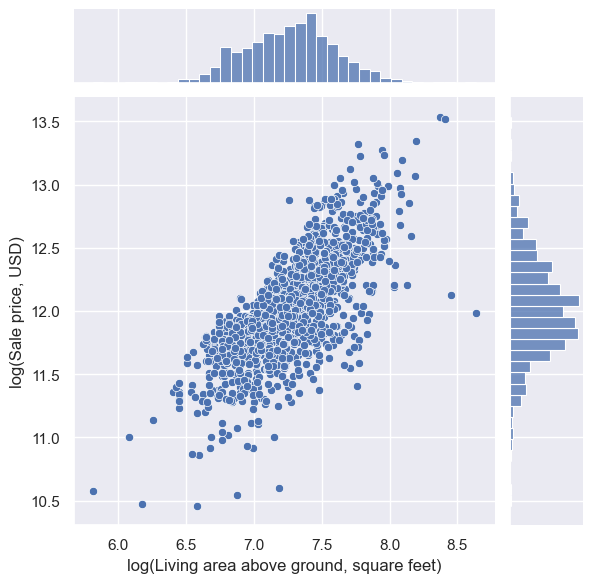

                                            log(Living area above ground, square feet)  \
log(Living area above ground, square feet)                                    1.000000   
log(Sale price, USD)                                                          0.730304   

                                            log(Sale price, USD)  
log(Living area above ground, square feet)              0.730304  
log(Sale price, USD)                                    1.000000  


In [20]:
livarea_vs_price(df)

As visualised with the scatter plot, there appears to be a strong, positive relationship between the log transformed living area above ground and sale price. The correlation value between the log-transformed living area and sale price is 0.729337, indicating a strong positive correlation. This suggests that as the living area increases, the sale price also tends to increase. The histograms along each axis show the distribution of each variable. Since the data is log-transformed, this indicates that the original values were spread over a wide range.

This feature will be useful to analyse and learn to predict the sale price as it is a feature all houses have, and it makes logical sense for the larger houses to have a high sale price.

#### Exterior material VS Sale Price

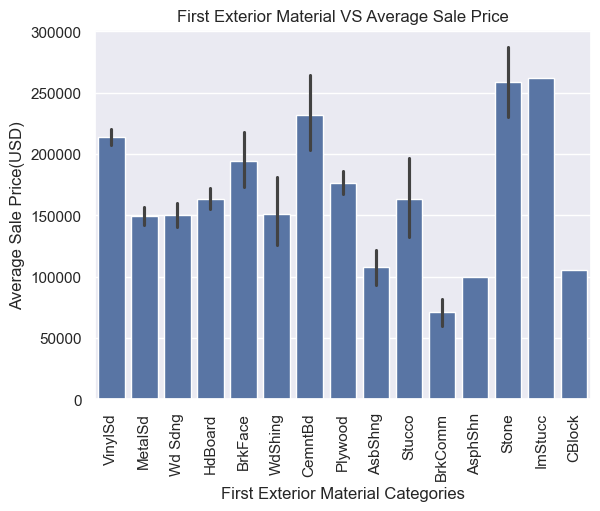

In [21]:
extmat_vs_price(df)

The bar plot of 'First Exterior Material VS Sale Price' allows us to compare the average sale prices across different categories of exterior materials. As appears by the height of the bars, we can see that the average price of houses sold with each exterior material varies significantly. It is observed that some materials such as Cement Board, Stone and Imitation Stucco have a higher average sale price compared to other materials. On the other hand, Brick Common have a relatively low average sale price than others.

This is because certain exterior materials might be preferred in the market, leading to higher sale prices and/or variation in sale price within the same exterior material.
The plot can also reveal differing trends in housing materials when additional information about the houses, such as presence of garages or basements etc. are compared alongside this feature. 

The exterior material feature may be a useful feature to use for prediction.

#### Remodel Year VS Sale Price

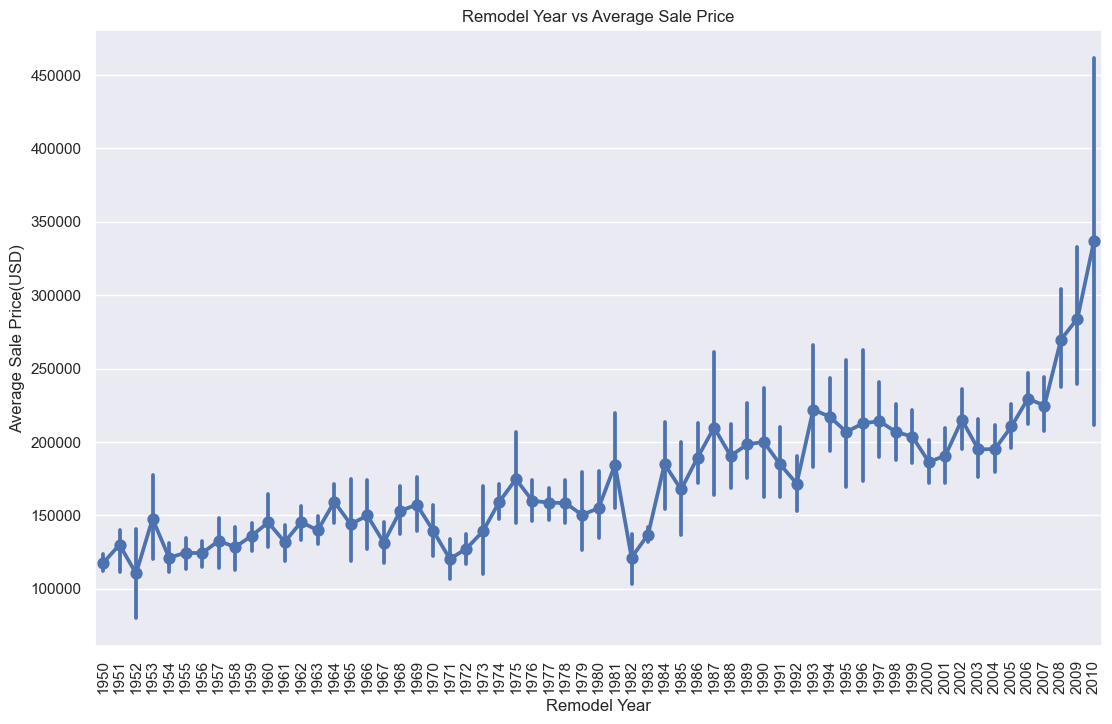

In [22]:
remodelyr_vs_price(df)

The point plot of Remodel Year vs Sale Price is useful for visualising trends over the varying remodel year. Each point represents the average sale price for houses remodeled in a particular year, and by connecting the points, the plot shows a positive relationship between the average sale price and the remodel year. The plot also includes error bars to indicate the variability or standard error around the mean sale price for each year.

The points show an upward trend, which suggests that sale prices tend to increase with more recent remodel years. This could indicate that more recently remodeled houses are more valuable or in higher demand. The plot can reveal how market dynamics and buyer preferences have changed over time, with newer remodels potentially incorporating more modern and desirable features. The houses remodeled more recently tend to sell for higher prices. This may be due to newer, more modern upgrades that appeal to buyers.

Since the plot shows the average sale price associated with each remodel year the sale price data was not log-transformed; as it will manage the outliers for the sale price by averaging the values.

#### Heating Quality VS Sale Price

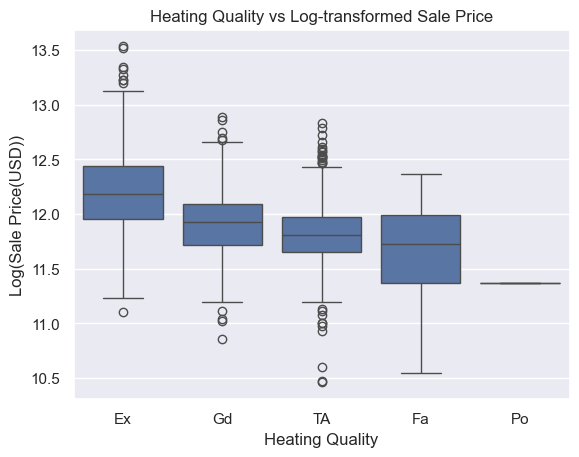

In [23]:
heatingqc_vs_price(df)

The box plot of 'Heating Quality vs Sale Price' provides a summary of the distribution of sale prices for each category of heating quality. The plot allows for comparing how different levels of heating quality impact the sale price, and it appears that the houses with excellent heating qualities tend to have a higher sale price. The centre of the boxplot for each quality rating tends to appear lower down the y-axis (sale price) as the heating quality changes from excellent to poor. This indicates that in most cases, the heating quality impacts the sale price of the house.

The boxes for 'Ex' (Excellent) and 'Gd' (Good) are positioned higher on the y-axis compared to 'TA' (Typical/Average), 'Fa' (Fair), and 'Po' (Poor), which indicates that houses with better heating quality tend to have higher sale prices. 

The height of the boxes and the length of the whiskers can show the variability in sale prices within each heating quality category. The box for 'Fa'(Fair) and 'Ex'(Excellent) is particularly tall (including the whiskers, excluding the outlying values), it suggests a wide range of sale prices for houses with excellent and fair heating quality. 

While the boxes for other qualities allow some variation in sale prices, the box of 'Po'(Poor) heating quality show a lack of variation in the data. This implies that houses with poor heating quality leave no room for other features to contribute to the sale price, whereas houses better (better than poor) heating qualities can vary in sale price depending on other features of the house.

The sale price was log-transformed in order to normalise the values to show appropriate variation in the distribution for each heating quality by managing the outliers for the sale price. By log-transforming the sale price, it reduces the impact of the outliers on the distribution.

Ultimately, the features: 'Overall quality', 'Total living area above ground', 'Exterior material', 'Remodel year' and 'Healing quality' have been visualised and analysed to find out whether the features will be useful for the model to learn and use to predict the house sale price. The features outlined appears to have a strong relationship with the sale price of the houses and would be useful to predict the sale price.